In [87]:
import numpy as np
import pandas as pd
pd.set_option('display.max.rows', 1000)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
%matplotlib inline 
sns.set(style='ticks')

## поиск и выбор набора данных для построения моделей машинного обучения

In [88]:
data = pd.read_csv('Pokemon.csv')

#### Pokemon with stats
This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. 
It has been of great use when teaching statistics to kids.

##### The data as described is:

* #: ID for each pokemon
* Name: Name of each pokemon
* Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
* Type 2: Some pokemon are dual type and have 2
* Total: sum of all stats that come after this, a general guide to how strong a pokemon is
* HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
* Attack: the base modifier for normal attacks (eg. Scratch, Punch)
* Defense: the base damage resistance against normal attacks
* SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
* SP Def: the base damage resistance against special attacks
* Speed: determines which pokemon attacks first each round
* Generation: number of generation
* Legendary: if Legendary Pokemon

In [89]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [90]:
data.shape

(800, 13)

In [91]:
data.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

## проведение разведочного анализа данных. построение графиков, необходимых для понимания структуры данных. анализ и заполнение пропусков в данных.

In [92]:
data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [93]:
le_bool = LabelEncoder()
data['Legendary'] = le.fit_transform(data['Legendary'])

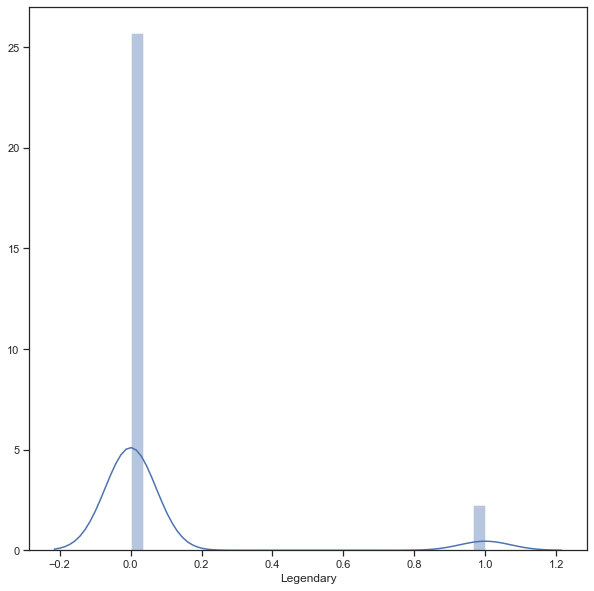

In [94]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Legendary'])

In [115]:
data['Legendary'].value_counts()

0    735
1     65
Name: Legendary, dtype: int64

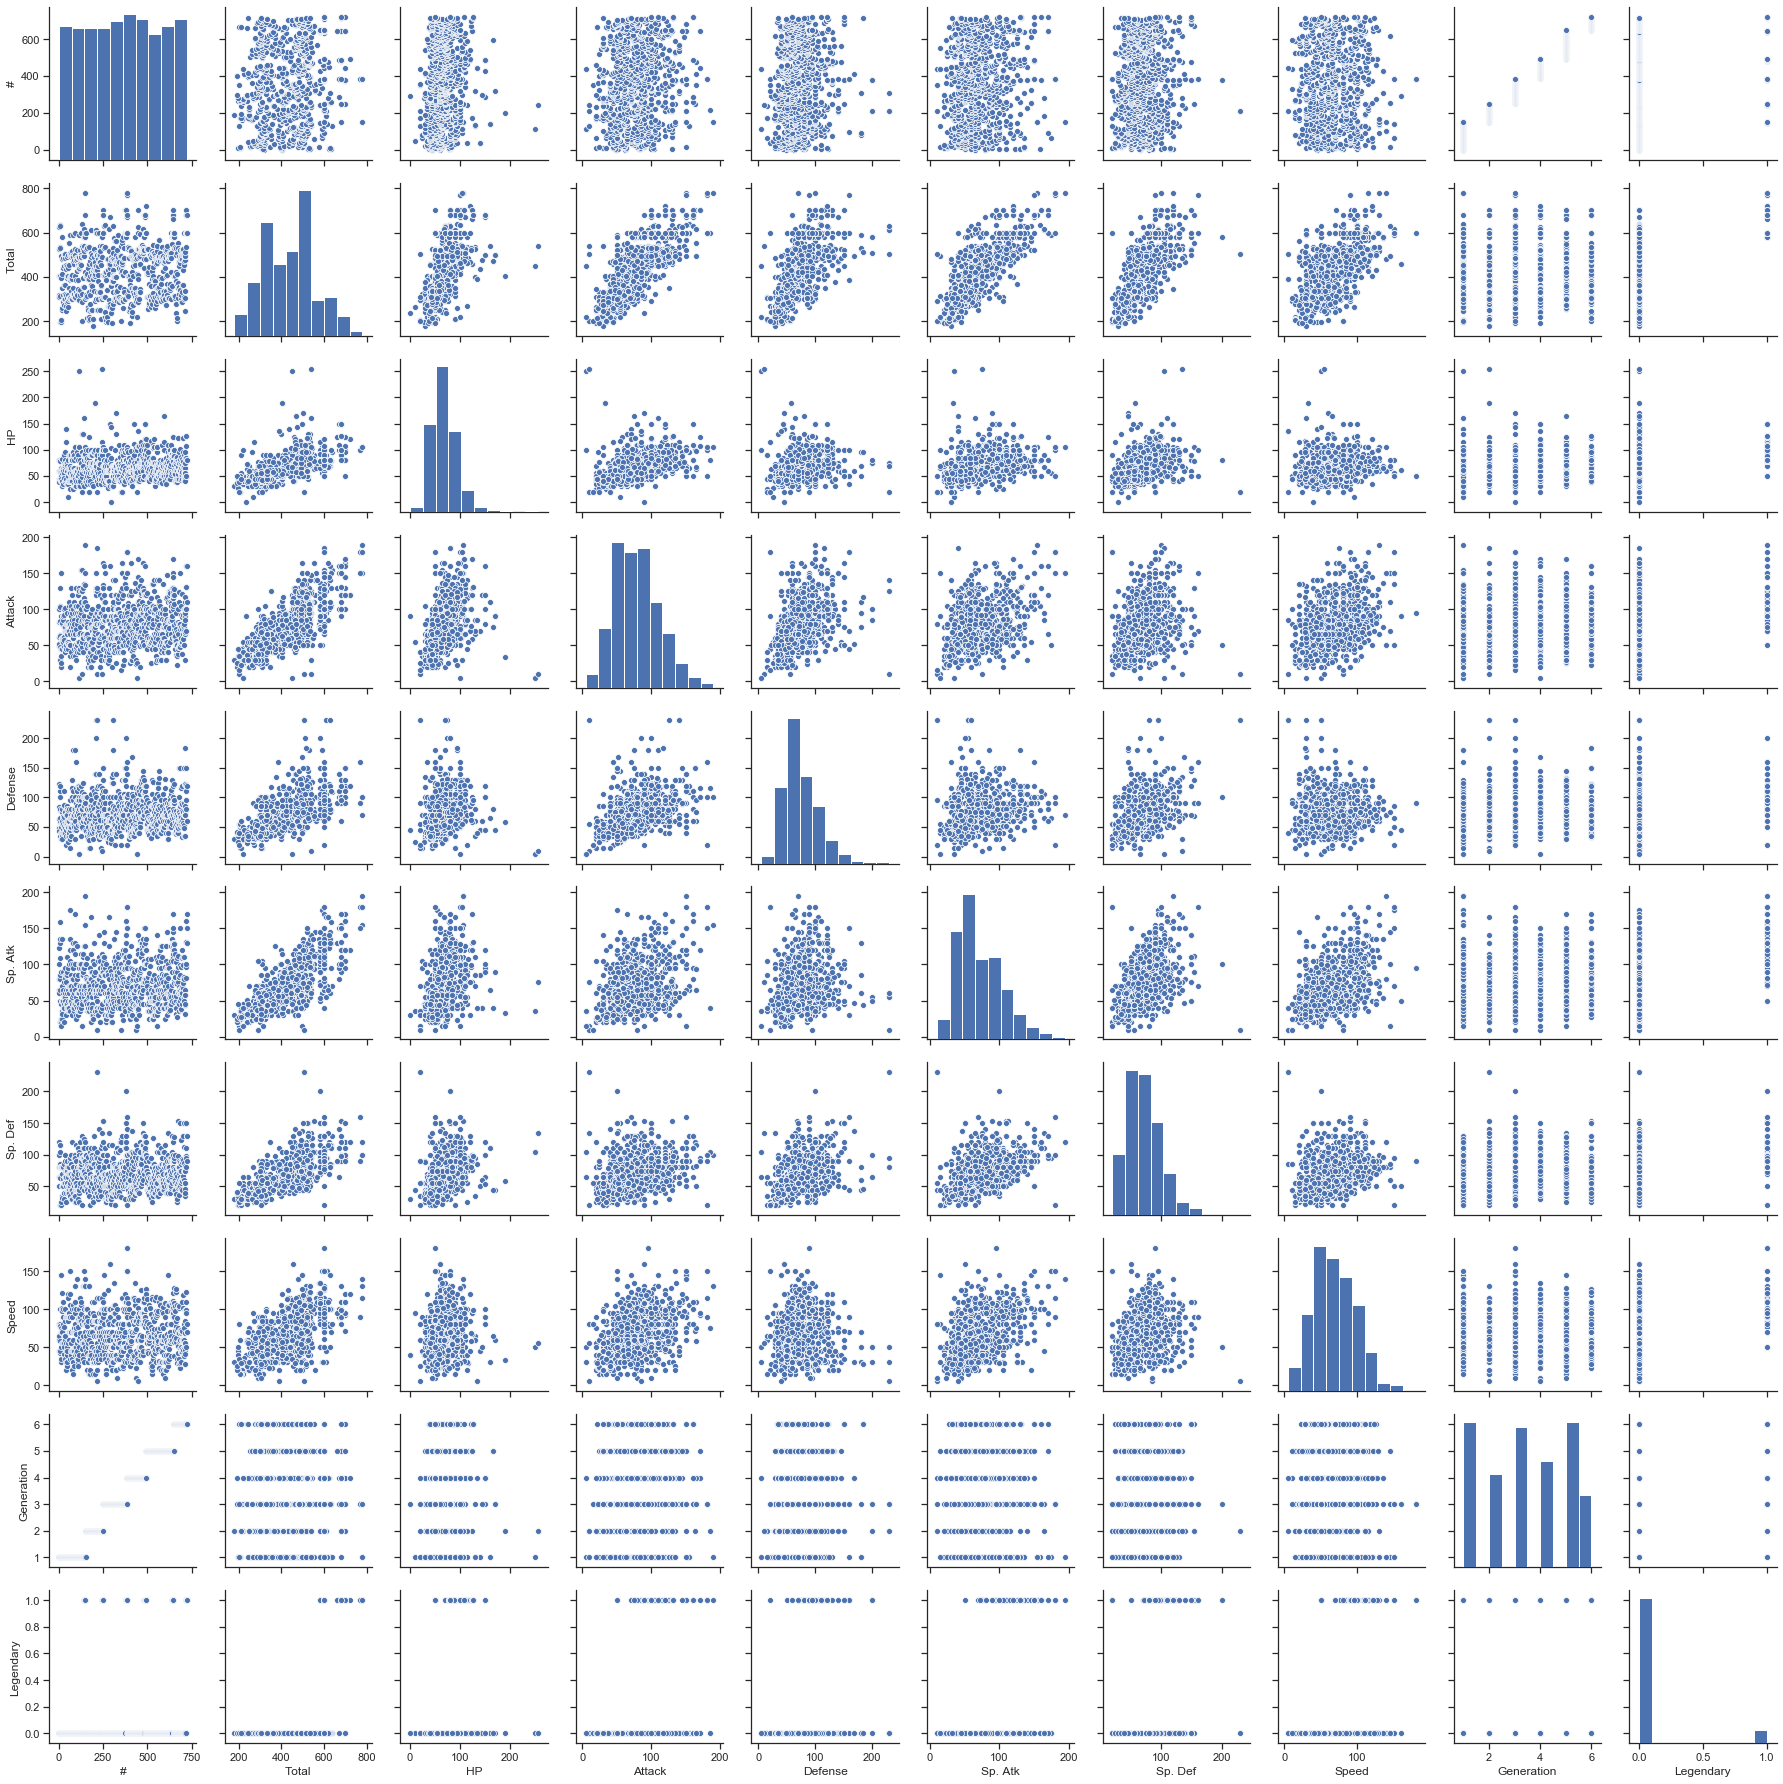

In [95]:
sns.pairplot(data)  # парные диаграммы

In [96]:
data.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [97]:
data = data.drop(columns=['#', 'Type 2'])
data.isnull().sum()

Name          0
Type 1        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [98]:
data.corr()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


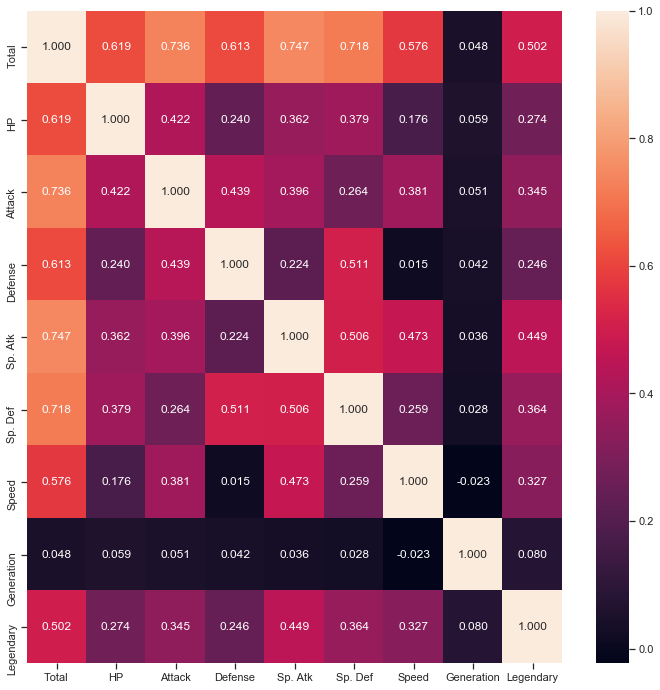

In [99]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), annot=True, fmt='.3f')

целевой признак – Legendary (легендарный). возьмем только те фичи, которые коррелируют с целевым признаком средне и сильно (≥ 0.3 по модулю)

In [100]:
# ≤ 0.3
data = data.drop(columns=['Generation', 'Defense', 'HP'])

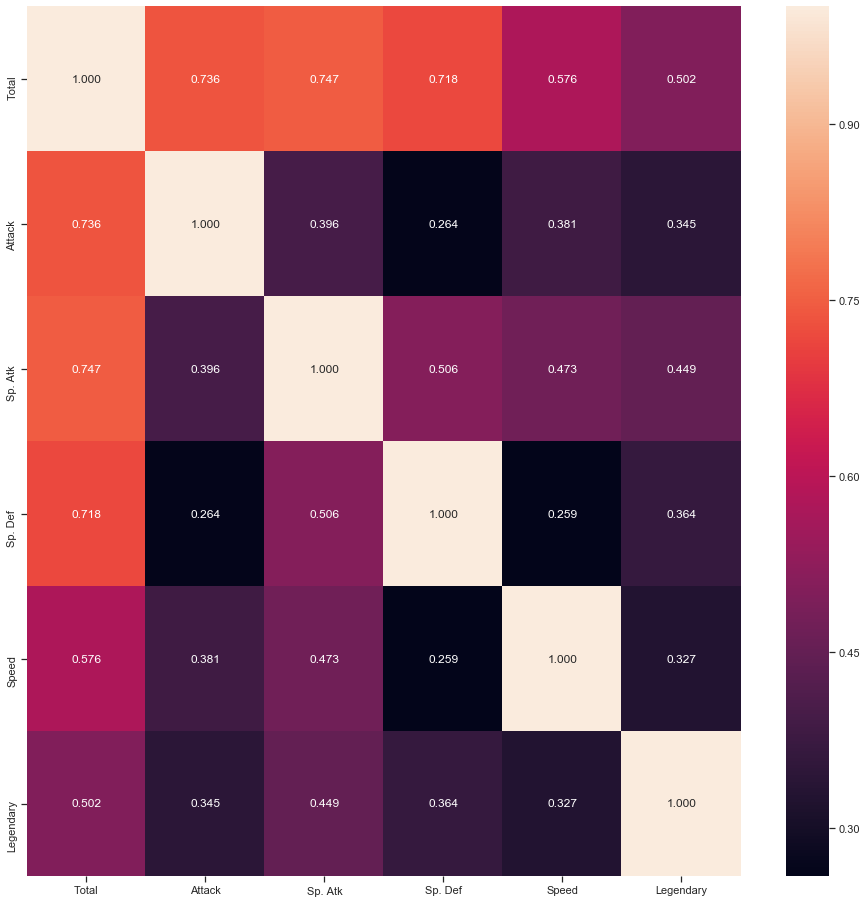

In [101]:
plt.figure(figsize=(16, 16))
sns.heatmap(data.corr(), annot=True, fmt='.3f')

## кодирование категориальных признаков

In [102]:
cat_cols = []
for col in data.columns:
    if data[col].dtype == 'object':
        cat_cols.append(col)
cat_cols

['Name', 'Type 1']

In [103]:
for col in cat_cols:
    print('`{}`: {} unique values'.format(col, len(data[col].unique())))

`Name`: 800 unique values
`Type 1`: 18 unique values


In [104]:
encoding_of_cat = {}
for col in cat_cols:
    le = LabelEncoder()
    data[[col]] = le.fit_transform(data[col])
    encoding_of_cat[col] = le

In [105]:
data.corr()

,Name,Type 1,Total,Attack,Sp. Atk,Sp. Def,Speed,Legendary
Name,1.000000,-0.067074,-0.071396,-0.081029,-0.063574,-0.069318,-0.031623,0.047575
Type 1,-0.067074,1.000000,0.023251,-0.037525,-0.006694,0.018911,-0.066471,-0.010162
Total,-0.071396,0.023251,1.000000,0.736211,0.747250,0.717609,0.575943,0.501758
Attack,-0.081029,-0.037525,0.736211,1.000000,0.396362,0.263990,0.381240,0.345408
Sp. Atk,-0.063574,-0.006694,0.747250,0.396362,1.000000,0.506121,0.473018,0.448907
Sp. Def,-0.069318,0.018911,0.717609,0.263990,0.506121,1.000000,0.259133,0.363937
Speed,-0.031623,-0.066471,0.575943,0.381240,0.473018,0.259133,1.000000,0.326715
Legendary,0.047575,-0.010162,0.501758,0.345408,0.448907,0.363937,0.326715,1.000000


целевой признак Legendary слабо коррелирует с Name и Type1, их тоже следует удалить

In [106]:
data = data.drop(columns=['Name', 'Type 1'])

## проведение корреляционного анализа данных. формирование промежуточных выводов о возможности построения моделей машинного обучения.

In [107]:
data.corr()

,Total,Attack,Sp. Atk,Sp. Def,Speed,Legendary
Total,1.000000,0.736211,0.747250,0.717609,0.575943,0.501758
Attack,0.736211,1.000000,0.396362,0.263990,0.381240,0.345408
Sp. Atk,0.747250,0.396362,1.000000,0.506121,0.473018,0.448907
Sp. Def,0.717609,0.263990,0.506121,1.000000,0.259133,0.363937
Speed,0.575943,0.381240,0.473018,0.259133,1.000000,0.326715
Legendary,0.501758,0.345408,0.448907,0.363937,0.326715,1.000000


корреляция была проанализирована в пункте 3, удалены признаки с слабой зависимостью с целевым признаком Legendary, он имеет сильную зависимость с Total, с остальными – среднюю.

## выбор метрик для последующей оценки качества моделей

стоит задача бинарной классификации, необходимо выбрать метрик, подходящие для бинарной классификации.

выбираем 'accuracy', поскольку она наиболее эффективно решает задачу для равных классов

In [179]:
from sklearn.metrics import balanced_accuracy_score, precision_score, f1_score
my_metrics = (balanced_accuracy_score, precision_score, f1_score)

from sklearn.model_selection import cross_validate, KFold, ShuffleSplit
cross_val_names = ('balanced_accuracy_score', 'precision_score', 'f1_score')

'accuracy' отражает точность по всем классам – простая очевидная метрика, balanced_accuracy_score – потому что сильное различие в количестве Legendary - true и Legendary - false.

precision - верно предсказанные среди всех объектов, которые были предсказаны положительно

f1_score объединяет precision и recall

In [180]:
def print_metrics(y_true, y_pred):
    for m in my_metrics:
        print('Metric {}: {}'.format(m.__name__, m(y_true, y_pred)))
        
def print_cross_val_scores(model, X_, y_, cv):
    print(cross_validate(model(), X_, y_, scoring=cross_val_names, cv=cv, return_train_score=True))

## выбор наиболее подходящих моделей для решения задачи классификации или регрессии.

Перед нами задача классификации (бинарной), выбраны следующие модели:
* KNeighborsClassifier
* LogisticRegression
* DecisionTreeClassifier
* Ансамбль BaggingClassifier с DecisionTreeClassifier
* Ансамбль Gradient boosting (XGBClassifier из xgboost library)

In [181]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

## формирование обучающей и тестовой выборок на основе исходного набора данных.

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
x, y = data[data.columns[range(5)]], data[data.columns[[5]]]
print('x:', x.columns)
print('y:', y.columns)

x: Index(['Total', 'Attack', 'Sp. Atk', 'Sp. Def', 'Speed'], dtype='object')
y: Index(['Legendary'], dtype='object')


In [184]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)
len(xtrain), len(xtest), len(ytrain), len(ytest)

(560, 240, 560, 240)

# Решение задачи бинарной классификации

## построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров.

### KNeighborsClassifier

In [185]:
k_neigh = KNeighborsClassifier(n_neighbors=3)
k_neigh.fit(xtrain, ytrain.values.ravel())
y_pred_k_neigh = k_neigh.predict(xtest)
y_pred_k_neigh

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [186]:
print_metrics(ytest, y_pred_k_neigh)

Metric balanced_accuracy_score: 0.9844444444444445
Metric precision_score: 0.6818181818181818
Metric f1_score: 0.8108108108108109


### LogisticRegression

In [257]:
log_res = LogisticRegression(C=1.0, max_iter=1000)
log_res.fit(xtrain, ytrain.values.ravel())
y_pred_log_res = log_res.predict(xtest)
y_pred_log_res

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [258]:
print_metrics(ytest, y_pred_log_res)

Metric balanced_accuracy_score: 0.6311111111111111
Metric precision_score: 0.8
Metric f1_score: 0.4


### DecisionTreeClassifier

In [189]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(xtrain, ytrain.values.ravel())
y_pred_tree = tree.predict(xtest)
y_pred_tree

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [190]:
print_metrics(ytest, y_pred_tree)

Metric balanced_accuracy_score: 0.8888888888888888
Metric precision_score: 0.7058823529411765
Metric f1_score: 0.7500000000000001


### BaggingClassifier with DecisionTreeClassifier

In [191]:
bc_trc = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=100)
bc_trc.fit(x, y.values.ravel())
y_pred_bc_trc = bc_trc.predict(xtest)
y_pred_bc_trc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [192]:
print_metrics(ytest, y_pred_bc_trc)

Metric balanced_accuracy_score: 0.9977777777777778
Metric precision_score: 0.9375
Metric f1_score: 0.967741935483871


### XGBClassifier

In [193]:
xg_trc = XGBClassifier(n_jobs=-1)
xg_trc.fit(x, y.values.ravel())
y_pred_xg_trc = xg_trc.predict(xtest)
y_pred_xg_trc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [194]:
print_metrics(ytest, y_pred_xg_trc)

Metric balanced_accuracy_score: 0.9977777777777778
Metric precision_score: 0.9375
Metric f1_score: 0.967741935483871


## подбор гиперпараметров для выбранных моделей.

In [158]:
from sklearn.model_selection import GridSearchCV, KFold, ShuffleSplit

### KNeighborsClassifier

In [195]:
n_neigh_values = range(1, 100)
param = [{'n_neighbors': np.array(n_neigh_values)}]
k_neigh_grid = GridSearchCV(KNeighborsClassifier(), param, cv=KFold(n_splits=10), scoring='balanced_accuracy',
                          return_train_score=True,
                          n_jobs=-1,
                         )
k_neigh_grid.fit(x, y.values.ravel())

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])}],
             pre_dis

In [201]:
k_neigh_grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [202]:
k_neigh_grid.best_score_

0.9327601126472095

In [203]:
k_neigh_grid.best_params_

{'n_neighbors': 13}

### LogisticRegression

In [282]:
n_neigh_values = range(1, 100)
param = [{'C': np.array(np.arange(0.1, 5.1, 0.1)),
          'max_iter': np.array([1000, 5000, 10000, 25000, 50000])}]
logres_grid = GridSearchCV(LogisticRegression(), param, cv=KFold(n_splits=10), scoring='balanced_accuracy',
                            return_train_score=True,
                          n_jobs=-1,
                         )
logres_grid.fit(x, y.values.ravel())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='w...
             param_grid=[{'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 

In [283]:
logres_grid.best_estimator_

LogisticRegression(C=4.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [284]:
logres_grid.best_score_

0.7878174719545687

In [285]:
logres_grid.best_params_

{'C': 4.5, 'max_iter': 1000}

### DecisionTreeClassifier

In [297]:
parameters = [{'random_state': np.array([state]),
               'max_depth': np.array([None, 10, 50, 100, 500, 1000, 5000, 10000]),
               'min_samples_split': np.array(range(2, 11)),
               'min_samples_leaf': np.array(range(1, 11))
              }]
tree_grid = GridSearchCV(DecisionTreeClassifier(), parameters, cv=ShuffleSplit(n_splits=10, test_size=0.3),
                         scoring='balanced_accuracy', 
                         n_jobs=-1, 
                         verbose=10,
                         return_train_score=True
                        )
tree_grid.fit(x, y.values.ravel())

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0393s.) Setting batch_size=10.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 348 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 458 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 568 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 978 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 1298 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 1468

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=0.3, train_size=None),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fractio...
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid=[{'max_depth': array([None, 10, 50

In [298]:
tree_grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [299]:
tree_grid.best_score_

0.8544258555405969

In [300]:
tree_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 42}

### BaggingClassifier with DecisionTreeClassifier

In [317]:
from sklearn.model_selection import GridSearchCV, KFold, ShuffleSplit
parameters = [{'n_estimators': np.array(range(1, 101, 5))}]
bagclass_grid = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(random_state=state)), parameters, cv=ShuffleSplit(n_splits=10, test_size=0.3),
                           scoring='balanced_accuracy',
                           n_jobs=-1,
                           verbose=10,
                             return_train_score=True
                          )
bagclass_grid.fit(x, y.values.ravel())

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0122s.) Setting batch_size=32.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.1s finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=0.3, train_size=None),
             error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                               

In [318]:
bagclass_grid.best_estimator_

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=42,
                                                        splitter='best'),
      

In [319]:
bagclass_grid.best_score_

0.8691028737180596

In [320]:
bagclass_grid.best_params_

{'n_estimators': 61}

### XGBClassifier

In [330]:
parameters = [{"colsample_bytree": [1.0], "min_child_weight": [0.8, 1.0, 1.2],
               'max_depth': range(3, 11), 'n_estimators': [25, 50, 75, 100]}]
xgbclass_grid = GridSearchCV(XGBClassifier(), parameters, cv=ShuffleSplit(n_splits=10, test_size=0.3),
                           scoring='balanced_accuracy',
                           n_jobs=-1,
                           verbose=10,
                             return_train_score=True
                          )
xgbclass_grid.fit(x, y.values.ravel())

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0299s.) Setting batch_size=12.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 548 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 836 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:    9.3s finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=0.3, train_size=None),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     n...
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid=[{'colsample_bytree': [1.0], 'max_depth': range(3, 11),
                          'min_child_we

In [331]:
xgbclass_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=0.8, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [332]:
xgbclass_grid.best_score_

0.8991548558982595

In [333]:
xgbclass_grid.best_params_

{'colsample_bytree': 1.0,
 'max_depth': 4,
 'min_child_weight': 0.8,
 'n_estimators': 50}

## повторение пункта 8 для найденных оптимальных значений гиперпараметров. сравнение качества полученных моделей с качеством baseline-моделей.

### KNeighborsClassifier

In [238]:
k_neigh_grid.best_estimator_.fit(xtrain, ytrain.values.ravel())

y_pred_k_neigh_new = k_neigh_grid.best_estimator_.predict(xtest)
print('old:')
print_metrics(ytest, y_pred_k_neigh)

print('\nnew:')
print_metrics(ytest, y_pred_k_neigh_new)

old:
Metric balanced_accuracy_score: 0.9844444444444445
Metric precision_score: 0.6818181818181818
Metric f1_score: 0.8108108108108109

new:
Metric balanced_accuracy_score: 0.9422222222222223
Metric precision_score: 0.56
Metric f1_score: 0.7000000000000001


### LogisticRegression

In [286]:
logres_grid.best_estimator_.fit(xtrain, ytrain.values.ravel())

y_pred_logres_new = logres_grid.best_estimator_.predict(xtest)
print('old:')
print_metrics(ytest, y_pred_log_res)

print('\nnew:')
print_metrics(ytest, y_pred_logres_new)

old:
Metric balanced_accuracy_score: 0.6311111111111111
Metric precision_score: 0.8
Metric f1_score: 0.4

new:
Metric balanced_accuracy_score: 0.7266666666666667
Metric precision_score: 0.7
Metric f1_score: 0.56


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### DecisionTreeClassifier

In [241]:
tree_grid.best_estimator_.fit(xtrain, ytrain.values.ravel())

y_pred_tree_new = tree_grid.best_estimator_.predict(xtest)
print('old:')
print_metrics(ytest, y_pred_tree)

print('\nnew:')
print_metrics(ytest, y_pred_tree_new)

old:
Metric balanced_accuracy_score: 0.8888888888888888
Metric precision_score: 0.7058823529411765
Metric f1_score: 0.7500000000000001

new:
Metric balanced_accuracy_score: 0.7266666666666667
Metric precision_score: 0.7
Metric f1_score: 0.56


### BaggingClassifier with DecisionTreeClassifier

In [246]:
bagclass_grid.best_estimator_.fit(xtrain, ytrain.values.ravel())

y_pred_bc_trc_new = bagclass_grid.best_estimator_.predict(xtest)
print('old:')
print_metrics(ytest, y_pred_bc_trc)

print('\nnew:')
print_metrics(ytest, y_pred_bc_trc_new)

old:
Metric balanced_accuracy_score: 0.9977777777777778
Metric precision_score: 0.9375
Metric f1_score: 0.967741935483871

new:
Metric balanced_accuracy_score: 0.8866666666666667
Metric precision_score: 0.6666666666666666
Metric f1_score: 0.7272727272727272


### XGBClassifier

In [248]:
xgbclass_grid.best_estimator_.fit(xtrain, ytrain.values.ravel())

y_pred_xg_trc_new = xgbclass_grid.best_estimator_.predict(xtest)
print('old:')
print_metrics(ytest, y_pred_xg_trc)

print('\nnew:')
print_metrics(ytest, y_pred_xg_trc_new)

old:
Metric balanced_accuracy_score: 0.9977777777777778
Metric precision_score: 0.9375
Metric f1_score: 0.967741935483871

new:
Metric balanced_accuracy_score: 0.9533333333333334
Metric precision_score: 0.7
Metric f1_score: 0.8


# Графическая реализация 

## формирование выводов о качестве построенных моделей на основе выбранных метрик.

In [250]:
from sklearn.model_selection import learning_curve, validation_curve

In [251]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [252]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring,
        n_jobs=-1
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

### KNeighborsClassifier

<module 'matplotlib.pyplot' from '/Users/a.kurganova/Library/Python/3.7/lib/python/site-packages/matplotlib/pyplot.py'>

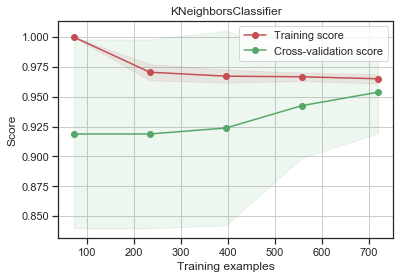

In [254]:
plot_learning_curve(k_neigh_grid.best_estimator_, 'KNeighborsClassifier',
                    x, y.values.ravel(), cv=KFold(n_splits=10))

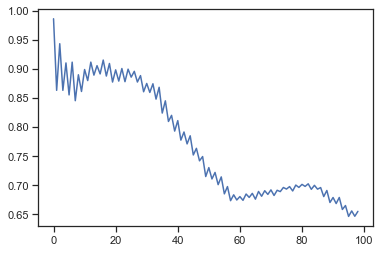

In [272]:
plt.plot(range(99), k_neigh_grid.cv_results_['mean_train_score'])

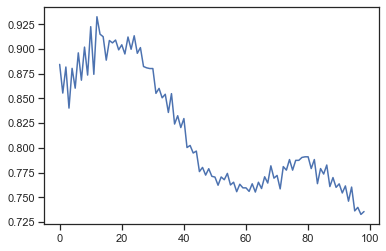

In [274]:
plt.plot(range(99), k_neigh_grid.cv_results_['mean_test_score'])

<module 'matplotlib.pyplot' from '/Users/a.kurganova/Library/Python/3.7/lib/python/site-packages/matplotlib/pyplot.py'>

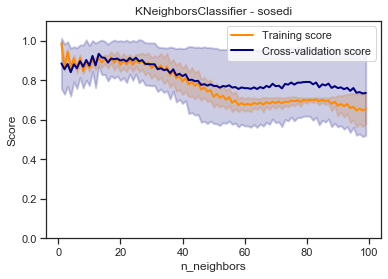

In [277]:
plot_validation_curve(KNeighborsClassifier(), 'KNeighborsClassifier - sosedi', 
                      x, y.values.ravel(), 
                      param_name='n_neighbors', param_range=range(1, 100), 
                      cv=KFold(n_splits=10), scoring="balanced_accuracy")

### LogisticRegression

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

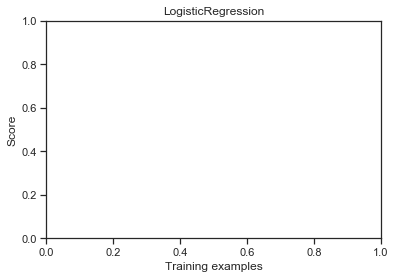

In [344]:
plot_learning_curve(logres_grid.best_estimator_, 'LogisticRegression',
                    x, y.values.ravel(), cv=KFold(n_splits=10))

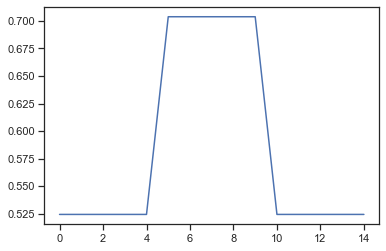

In [279]:
plt.plot(range(15), logres_grid.cv_results_['mean_train_score'])

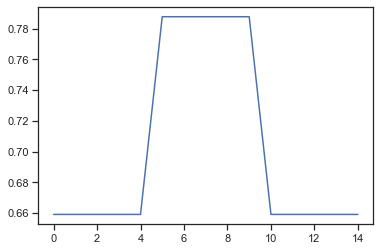

In [280]:
plt.plot(range(15), logres_grid.cv_results_['mean_test_score'])

<module 'matplotlib.pyplot' from '/Users/a.kurganova/Library/Python/3.7/lib/python/site-packages/matplotlib/pyplot.py'>

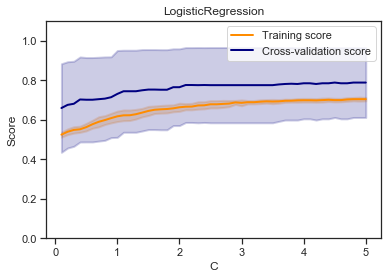

In [304]:
plot_validation_curve(LogisticRegression(), 'LogisticRegression', 
                      x, y.values.ravel(), 
                      param_name='C', param_range=np.array(np.arange(0.1, 5.1, 0.1)), 
                      cv=KFold(n_splits=10), scoring="balanced_accuracy")

<module 'matplotlib.pyplot' from '/Users/a.kurganova/Library/Python/3.7/lib/python/site-packages/matplotlib/pyplot.py'>

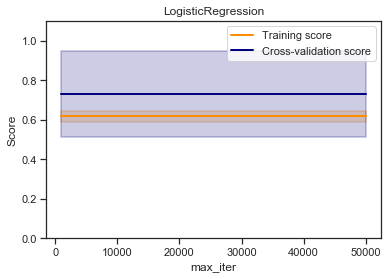

In [305]:
plot_validation_curve(LogisticRegression(), 'LogisticRegression', 
                      x, y.values.ravel(), 
                      param_name='max_iter', param_range=np.array([1000, 5000, 10000, 25000, 50000]), 
                      cv=KFold(n_splits=10), scoring="balanced_accuracy")

### DecisionTreeClassifier

<module 'matplotlib.pyplot' from '/Users/a.kurganova/Library/Python/3.7/lib/python/site-packages/matplotlib/pyplot.py'>

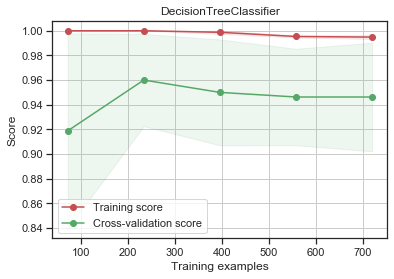

In [301]:
plot_learning_curve(tree_grid.best_estimator_, 'DecisionTreeClassifier',
                    x, y.values.ravel(), cv=KFold(n_splits=10))

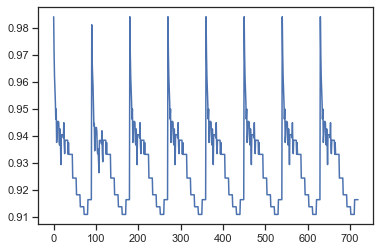

In [302]:
plt.plot(range(720), tree_grid.cv_results_['mean_train_score'])

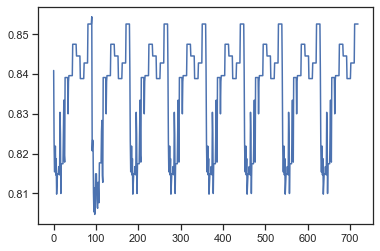

In [303]:
plt.plot(range(720), tree_grid.cv_results_['mean_test_score'])

<module 'matplotlib.pyplot' from '/Users/a.kurganova/Library/Python/3.7/lib/python/site-packages/matplotlib/pyplot.py'>

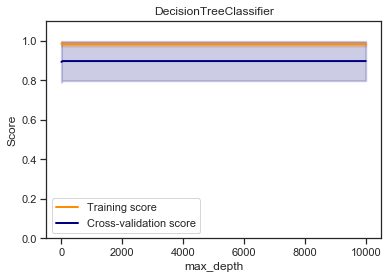

In [308]:
plot_validation_curve(DecisionTreeClassifier(random_state=42), 'DecisionTreeClassifier', 
                      x, y.values.ravel(), 
                      param_name='max_depth', param_range=np.array([10, 50, 100, 500, 1000, 5000, 10000]), 
                      cv=KFold(n_splits=10), scoring="balanced_accuracy")

<module 'matplotlib.pyplot' from '/Users/a.kurganova/Library/Python/3.7/lib/python/site-packages/matplotlib/pyplot.py'>

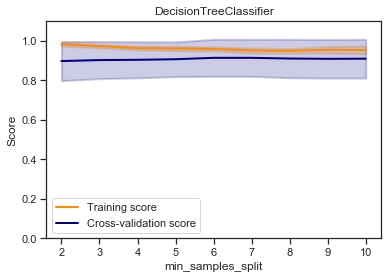

In [310]:
plot_validation_curve(DecisionTreeClassifier(random_state=42), 'DecisionTreeClassifier', 
                      x, y.values.ravel(), 
                      param_name='min_samples_split', param_range=np.array(range(2, 11)), 
                      cv=KFold(n_splits=10), scoring="balanced_accuracy")

<module 'matplotlib.pyplot' from '/Users/a.kurganova/Library/Python/3.7/lib/python/site-packages/matplotlib/pyplot.py'>

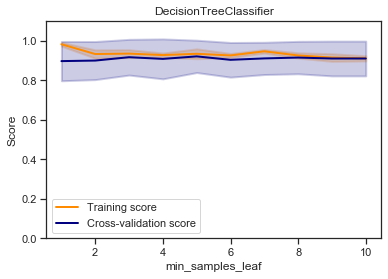

In [311]:
plot_validation_curve(DecisionTreeClassifier(random_state=42), 'DecisionTreeClassifier', 
                      x, y.values.ravel(), 
                      param_name='min_samples_leaf', param_range=np.array(range(1, 11)), 
                      cv=KFold(n_splits=10), scoring="balanced_accuracy")

### BaggingClassifier with DecisionTreeClassifier

<module 'matplotlib.pyplot' from '/Users/a.kurganova/Library/Python/3.7/lib/python/site-packages/matplotlib/pyplot.py'>

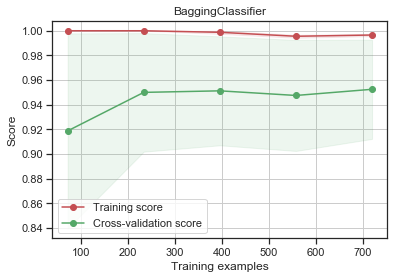

In [313]:
plot_learning_curve(bagclass_grid.best_estimator_, 'BaggingClassifier',
                    x, y.values.ravel(), cv=KFold(n_splits=10))

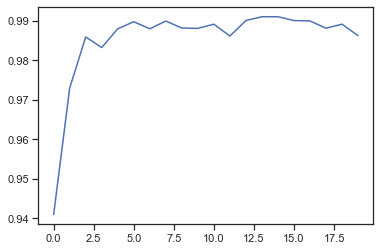

In [322]:
plt.plot(range(20), bagclass_grid.cv_results_['mean_train_score'])

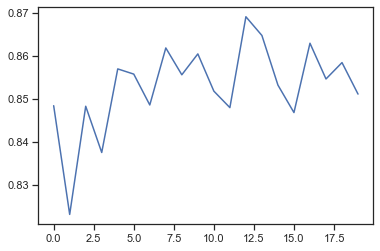

In [321]:
plt.plot(range(20), bagclass_grid.cv_results_['mean_test_score'])

<module 'matplotlib.pyplot' from '/Users/a.kurganova/Library/Python/3.7/lib/python/site-packages/matplotlib/pyplot.py'>

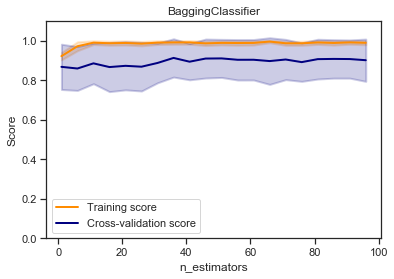

In [325]:
plot_validation_curve(BaggingClassifier(DecisionTreeClassifier(random_state=42)), 'BaggingClassifier', 
                      x, y.values.ravel(), 
                      param_name='n_estimators', param_range=np.array(range(1, 101, 5)), 
                      cv=KFold(n_splits=10), scoring="balanced_accuracy")

### XGBClassifier

<module 'matplotlib.pyplot' from '/Users/a.kurganova/Library/Python/3.7/lib/python/site-packages/matplotlib/pyplot.py'>

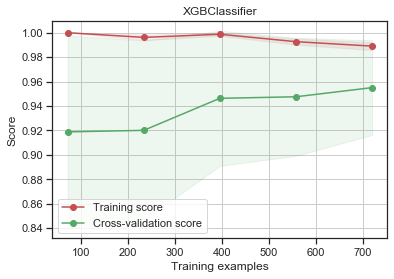

In [326]:
plot_learning_curve(xgbclass_grid.best_estimator_, 'XGBClassifier',
                    x, y.values.ravel(), cv=KFold(n_splits=10))

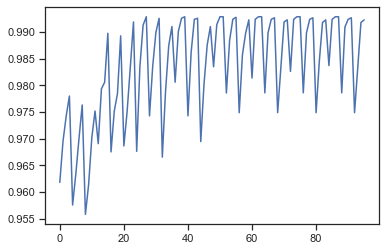

In [337]:
plt.plot(range(96), xgbclass_grid.cv_results_['mean_train_score'])

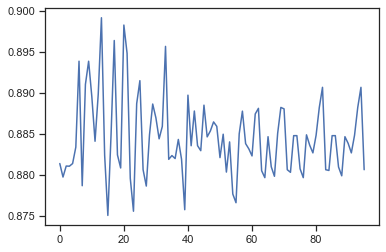

In [339]:
plt.plot(range(96), xgbclass_grid.cv_results_['mean_test_score'])

<module 'matplotlib.pyplot' from '/Users/a.kurganova/Library/Python/3.7/lib/python/site-packages/matplotlib/pyplot.py'>

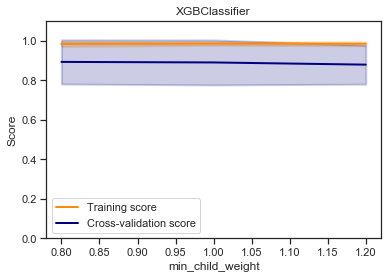

In [340]:
plot_validation_curve(XGBClassifier(colsample_bytree=1.0), 'XGBClassifier', 
                      x, y.values.ravel(), 
                      param_name='min_child_weight', param_range=np.array([0.8, 1.0, 1.2]), 
                      cv=KFold(n_splits=10), scoring="balanced_accuracy")

<module 'matplotlib.pyplot' from '/Users/a.kurganova/Library/Python/3.7/lib/python/site-packages/matplotlib/pyplot.py'>

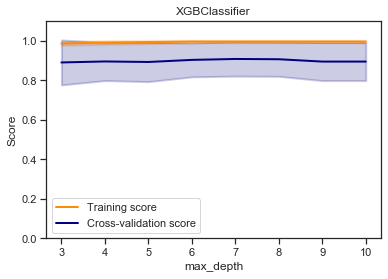

In [342]:
plot_validation_curve(XGBClassifier(colsample_bytree=1.0), 'XGBClassifier', 
                      x, y.values.ravel(), 
                      param_name='max_depth', param_range=np.array(range(3, 11)), 
                      cv=KFold(n_splits=10), scoring="balanced_accuracy")

<module 'matplotlib.pyplot' from '/Users/a.kurganova/Library/Python/3.7/lib/python/site-packages/matplotlib/pyplot.py'>

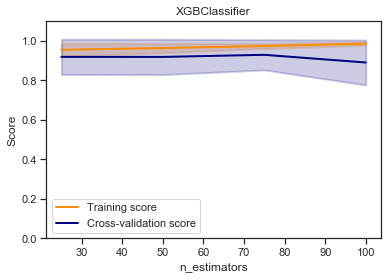

In [343]:
plot_validation_curve(XGBClassifier(colsample_bytree=1.0), 'XGBClassifier', 
                      x, y.values.ravel(), 
                      param_name='n_estimators', param_range=np.array([25, 50, 75, 100]), 
                      cv=KFold(n_splits=10), scoring="balanced_accuracy")